Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Задание функций, градиентов и гессионов

f = x^2 + y^2 + z^2

g = x^3 + y^3 - 3xy

h = x^4

In [ ]:
def f(x):
  x,y,z = x
  return x**2 + y**2 + z**2

def grad_f(x):
  x,y,z = x
  return np.array([2*x, 2*y, 2*z])

def hessian_f(x):
  x,y,z = x
  return np.array([[2, 0, 0],
                   [0, 2, 0],
                   [0, 0, 2]])

def g(x):
  x, y = x
  return x**3 + y**3 - 3*x*y

def grad_g(x):
  x, y = x
  return np.array([3*x**2 - 3*y, 3*y**2 - 3*x])

def hessian_g(x):
  x, y = x
  return np.array([[6*x, -3],
                   [-3, 6*y]])

def h(x):
  return x**4

def grad_h(x):
  return 4*x**3

def hessian_h(x):
  return np.array([[12*x**2]])

#Проверка на выпуклость

Метод сопряенных градиентов применим только для выпуклых функций, поэтому сначала надо проверить на выпуклость

In [ ]:
def check_convexity(func, grad_func, hessian_func, x_range):
  for x in x_range:
      H = hessian_func(x)
      eigenvalues = np.linalg.eigvals(H)
      if not np.all(eigenvalues >= 0):
        return False
  return True

In [ ]:
# Проверка выпуклости f(x, y, z)
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
z = np.linspace(-10, 10, 10)
x_range = np.array(np.meshgrid(x, y, z)).T.reshape(-1, 3)
# print(x_range)
is_convex = check_convexity(f, grad_f, hessian_f, x_range)
print(f"f(x, y, z) выпуклая: {is_convex}")

# Проверка выпуклости g(x, y)
y_range = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
is_convex = check_convexity(g, grad_g, hessian_g, y_range)
print(f"g(x, y) выпуклая: {is_convex}")

# Проверка выпуклости h(x)
x_range = np.linspace(-10, 10, 10)
is_convex = check_convexity(h, grad_h, hessian_h, x)
print(f"h(x) выпуклая: {is_convex}")

f(x, y, z) выпуклая: True
g(x, y) выпуклая: False
h(x) выпуклая: True


#Применение метода сопряженных градиентов

In [ ]:
def conjugate_gradient3(f, grad_f, x0, tol=1e-6, max_iter=1000, alpha_max=1.0, c=0.5, rho=0.5, alpha_min=1e-8):
  """
  Метод сопряженных градиентов с backtracking line search.

  Args:
    f: Функция, для которой нужно найти минимум.
    grad_f: Градиент функции.
    x0: Начальная точка поиска.
    tol: Допустимая погрешность.
    max_iter: Максимальное количество итераций.
    alpha_max: Максимальная длина шага.
    c: Параметр для backtracking line search.
    rho: Параметр для backtracking line search.
    alpha_min: Минимальная длина шага.

  Returns:
    Кортеж (x_min, f_min), где x_min - точка минимума, f_min - значение функции в минимуме.
  """
  arr_f = [f(x0)]
  x = x0
  r = -grad_f(x)
  d = r

  for i in range(max_iter):
    alpha = alpha_max
    while f(x + alpha * d) > f(x) + c * alpha * np.dot(grad_f(x), d) and alpha > alpha_min:
      alpha *= rho

    if alpha < alpha_min:
      break

    x = x + alpha * d
    arr_f.append(f(x))
    r_new = r - alpha * grad_f(x + d)
    beta = np.dot(r_new, r_new) / np.dot(r, r)
    d = r_new + beta * d
    r = r_new

    if np.linalg.norm(r) < tol:
      break

  f_min = f(x)
  return x, f_min, arr_f

In [ ]:
# Начальные точки
x0_1 = np.array([1, 1, 6])
x0_2 = np.array([8, -2])
x0_3 = -0.5

In [ ]:
x_min1, f_min1, arr_f1 = conjugate_gradient3(f, grad_f, x0_1)
x_min2, f_min2, arr_f2 = conjugate_gradient3(g, grad_g, x0_2)
x_min3, f_min3, arr_f3 = conjugate_gradient3(h, grad_h, x0_3)

<ipython-input-177-27efd86532f7>:17: RuntimeWarning: overflow encountered in scalar power
  return x**3 + y**3 - 3*x*y
<ipython-input-177-27efd86532f7>:17: RuntimeWarning: invalid value encountered in scalar add
  return x**3 + y**3 - 3*x*y
<ipython-input-177-27efd86532f7>:21: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([3*x**2 - 3*y, 3*y**2 - 3*x])


In [ ]:
def to_float(value):
    try:
      arr = []
      for i in value:
        arr.append("{:.2f}".format(i))
      return arr
    except:
      return "{:.2f}".format(value)

print(f"x_min1: {to_float(x_min1)}, f_min1: {to_float(f_min1)} за {len(arr_f1)} итераций")
print(f"x_min1: {to_float(x_min2)}, f_min1: {to_float(f_min2)} за {len(arr_f2)} итераций")
print(f"x_min1: {to_float(x_min3)}, f_min1: {to_float(f_min3)} за {len(arr_f3)} итераций")

x_min1: ['0.00', '0.00', '0.00'], f_min1: 0.00 за 2 итераций
x_min1: ['nan', 'nan'], f_min1: nan за 1001 итераций
x_min1: -0.00, f_min1: 0.00 за 41 итераций


Как мы видим, из-за того, что вторая функция не выпуклая, то метод не смог найти для нее точку минимума

#Графики

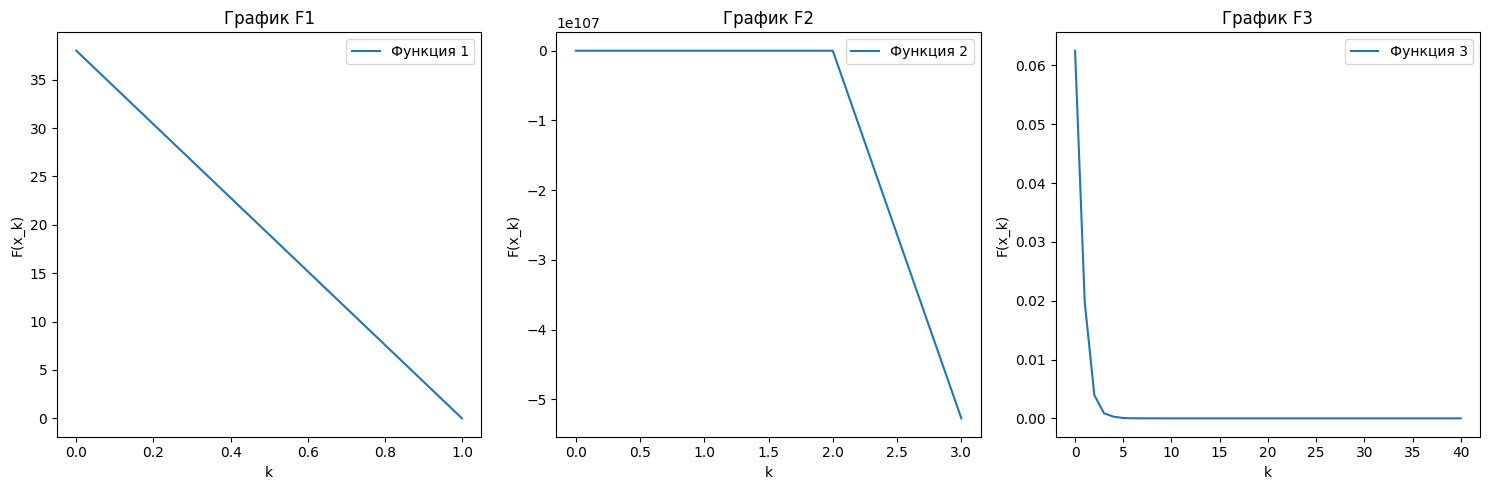

In [ ]:
import matplotlib.pyplot as plt

# Создаем фигуру и оси для трех графиков
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 колонки

# График 1
axs[0].plot(range(len(arr_f1)), arr_f1, label="Функция 1")
axs[0].set_xlabel("k")
axs[0].set_ylabel("F(x_k)")
axs[0].set_title("График F1")
axs[0].legend()

# График 2
axs[1].plot(range(len(arr_f2)), arr_f2, label="Функция 2")
axs[1].set_xlabel("k")
axs[1].set_ylabel("F(x_k)")
axs[1].set_title("График F2")
axs[1].legend()

# График 3
axs[2].plot(range(len(arr_f3)), arr_f3, label="Функция 3")
axs[2].set_xlabel("k")
axs[2].set_ylabel("F(x_k)")
axs[2].set_title("График F3")
axs[2].legend()

# Показываем графики
plt.tight_layout()  # Для улучшения расположения графиков
plt.show()


Аналогично: первая функция нашла свой минимум за 2 итерации, 2-я не нашла минимум корректно (значения после 3-й итерации = nan, что не отображено на графике), а 3-я нашла минимум за 40 итераций